In [29]:
from spec_id import Gen_spec, Scale_model
from scipy.interpolate import interp1d, interp2d
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126')
lzDB = galDB.query('hi_res_specz < 1.16')
mzDB = galDB.query('1.16 < hi_res_specz < 1.3')
hzDB = galDB.query('1.3 < hi_res_specz < 1.45')
uhzDB = galDB.query('1.45 < hi_res_specz')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [61]:
print np.median(lzDB['SN'])
print np.median(mzDB['SN'])
print np.median(hzDB['SN'])
print np.median(uhzDB['SN'])

9.01063001676
8.45000460281
4.14300752416
1.93740108692


In [9]:
print (np.min(lzDB['hi_res_specz']) + np.max(lzDB['hi_res_specz'])) / 2
print (np.min(mzDB['hi_res_specz']) + np.max(mzDB['hi_res_specz'])) / 2
print (np.min(hzDB['hi_res_specz']) + np.max(hzDB['hi_res_specz'])) / 2
print (np.min(uhzDB['hi_res_specz']) + np.max(uhzDB['hi_res_specz'])) / 2


1.082
1.2165
1.3685
1.636


In [8]:
(1.514+1.758)/2

1.6360000000000001

In [5]:
print galDB['hi_res_specz'][220]
print galDB['hi_res_specz'][61] 
print galDB['hi_res_specz'][232] 
print galDB['hi_res_specz'][248]

1.022
1.251
1.328
1.611


In [157]:
spec1 = Gen_spec(galDB['gids'][220], 1.082, delayed=True,maxwv=11400)
spec2 = Gen_spec(galDB['gids'][61], 1.217, delayed=True,maxwv=11400)
spec3 = Gen_spec(galDB['gids'][232], 1.369, delayed=True,maxwv=11400)
spec4 = Gen_spec(galDB['gids'][248], 1.636, delayed=True,maxwv=11400)

spec1.Sim_spec(0.019,2.2,8.0)
spec2.Sim_spec(0.019,2.2,8.0)
spec3.Sim_spec(0.019,2.2,8.0)
spec4.Sim_spec(0.019,2.2,8.0)


../data/galaxy_flts/s39170_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s39170_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s39170_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s39170_flt: save ../data/galaxy_flts/s39170_flt.detect_seg.fits, ../data/galaxy_flts/s39170_flt.detect.cat
../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../dat

In [158]:
print SNR(spec1.gal_wv,spec1.fl,spec1.gal_er)
print SNR(spec2.gal_wv,spec2.fl,spec2.gal_er * 1.628)
print SNR(spec3.gal_wv,spec3.fl,spec3.gal_er)
print SNR(spec4.gal_wv,spec4.fl,spec4.gal_er)


22.5841010884
10.0000243995
5.05921237488
3.71699934468


In [74]:
def SNR(wave,flux,error):
    IDX = [U for U in range(len(wave)) if 8500 < wave[U] < 10500]
#     IDX = [U for U in range(len(wave)) if 7000 < wave[U] < 11500]

    fl = np.trapz(flux[IDX],wave[IDX])
    er = np.trapz(error[IDX],wave[IDX])
    return fl/er

In [75]:
def SNR_correct(wave,flux,error,SNR_desired): 
    sno = SNR(wave,flux,error)
    return sno / SNR_desired

In [76]:
print SNR_correct(spec1.gal_wv,spec1.fl,spec1.gal_er,10)
print SNR_correct(spec2.gal_wv,spec2.fl,spec2.gal_er,10)
print SNR_correct(spec3.gal_wv,spec3.fl,spec3.gal_er,10)
print SNR_correct(spec4.gal_wv,spec4.fl,spec4.gal_er,10)

1.76660074229
1.62800397224
1.40979464995
1.23573564554


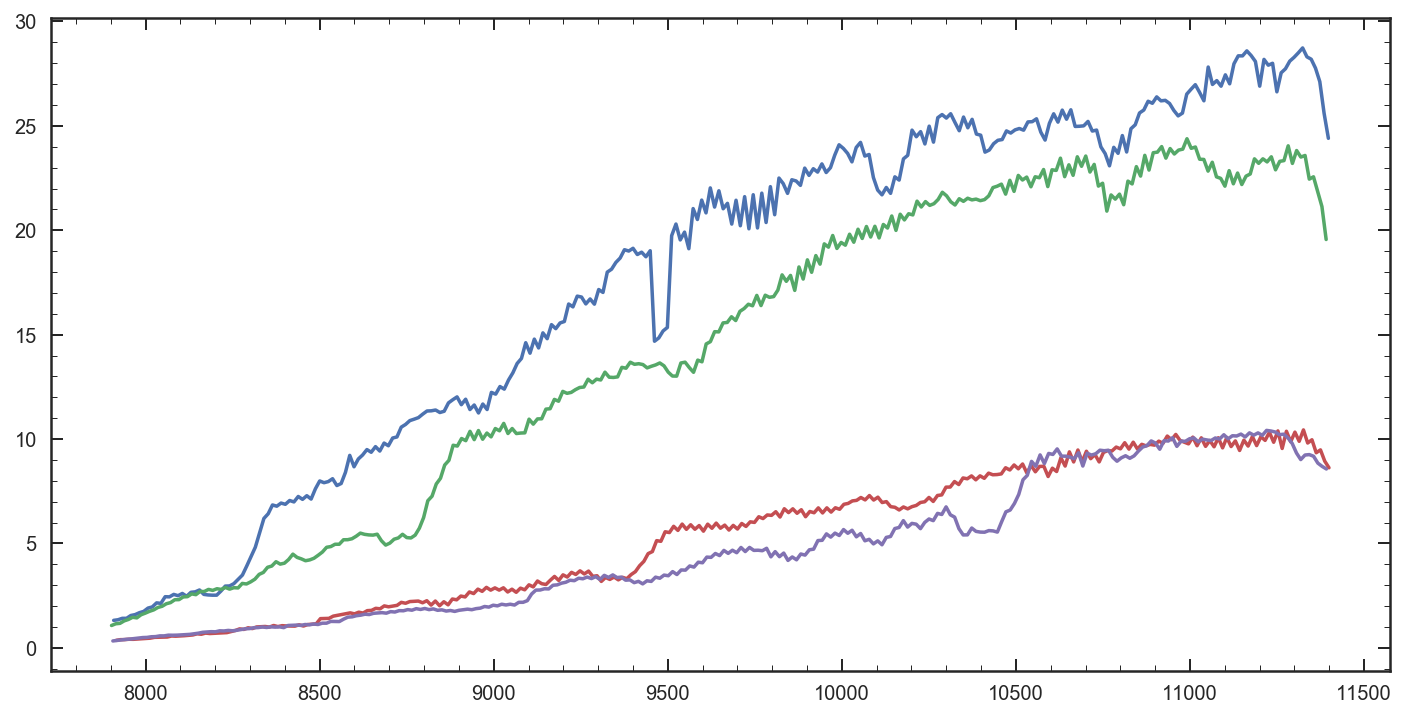

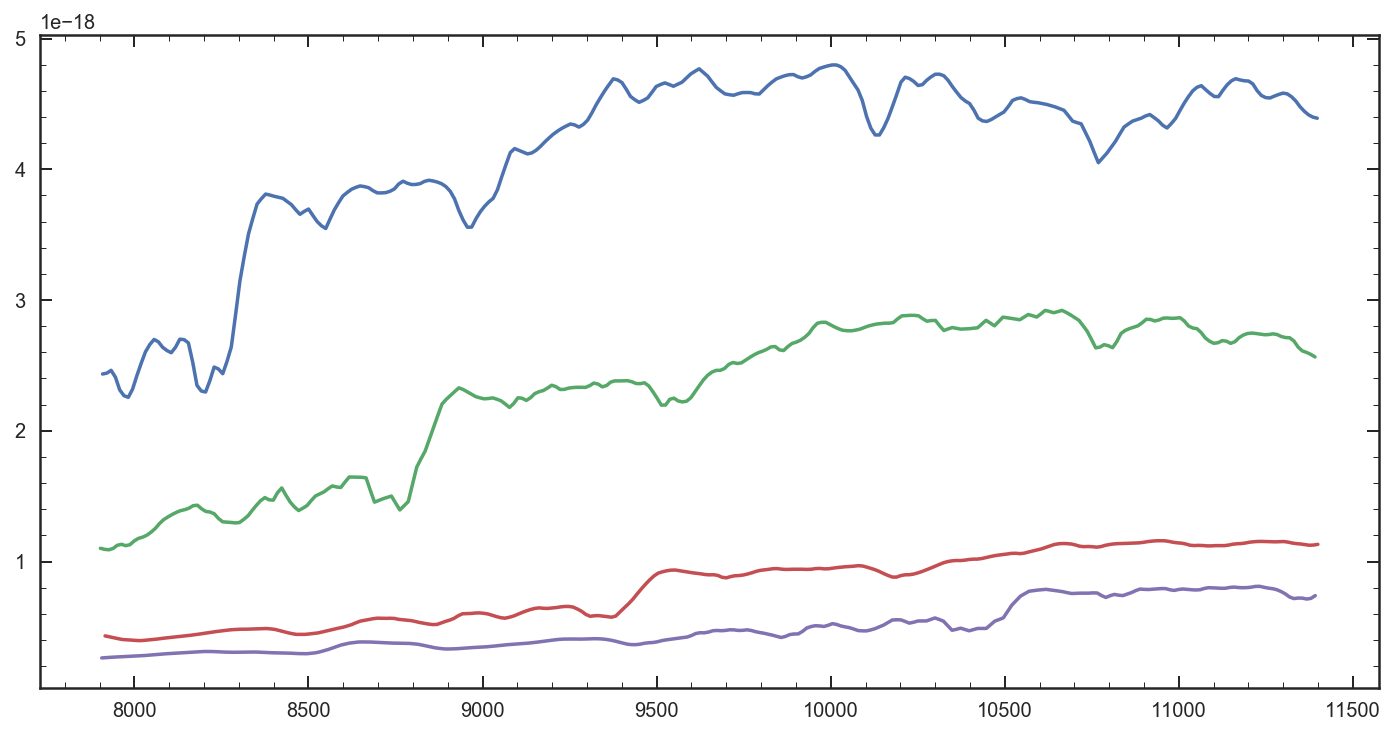

In [159]:
plt.figure(figsize=[12,6])
plt.plot(spec1.gal_wv,spec1.fl/(spec1.gal_er * 1.374))
plt.plot(spec2.gal_wv,(spec2.fl)/(spec2.gal_er * 1.292))
plt.plot(spec3.gal_wv,(spec3.fl)/(spec3.gal_er * 1.208))
plt.plot(spec4.gal_wv,(spec4.fl)/(spec4.gal_er * 1.163))
# plt.axvspan(10500, 11400, alpha = 0.5)

plt.figure(figsize=[12,6])
plt.plot(spec1.gal_wv,spec1.fl)
plt.plot(spec2.gal_wv,spec2.fl*C2)
plt.plot(spec3.gal_wv,spec3.fl*C3)
plt.plot(spec4.gal_wv,spec4.fl*C4)


In [40]:
print np.mean(spec1.fl)
print np.mean(spec2.fl*C2)
print np.mean(spec3.fl*C3)
print np.mean(spec4.fl*C4)

2.49616046988e-18
2.3253520097e-18
2.16010930986e-18
2.06942367916e-18


In [39]:
C2 = Scale_model(spec1.fl,spec1.gal_er,spec2.fl)
C3 = Scale_model(spec1.fl,spec1.gal_er,spec3.fl)
C4 = Scale_model(spec1.fl,spec1.gal_er,spec4.fl)


In [162]:
print galDB['gids'][248]

s44042


In [163]:
sn_array = [2,4,8,12,16]
m_array = [0.006,0.011,0.015,0.019,0.023,0.027]
a_array = [2.0,1.5,3.3,2.2,4.0,2.8]

for i in range(len(m_array)):
    spec1.Sim_spec(m_array[i],a_array[i],8.0)
    spec2.Sim_spec(m_array[i],a_array[i],8.0)
    spec3.Sim_spec(m_array[i],a_array[i],8.0)
    spec4.Sim_spec(m_array[i],a_array[i],8.0)
    for ii in range(len(sn_array)):
        C1 =SNR_correct(spec1.gal_wv,spec1.fl,spec1.gal_er,sn_array[ii])
        C2 =SNR_correct(spec2.gal_wv,spec2.fl,spec2.gal_er,sn_array[ii])
        C3 = SNR_correct(spec3.gal_wv,spec3.fl,spec3.gal_er,sn_array[ii])
        C4 = SNR_correct(spec4.gal_wv,spec4.fl,spec4.gal_er,sn_array[ii])
        
        slrm_text=["#!/bin/bash\n#SBATCH -J MC_fit-{0!s}\n#SBATCH -p background\n#SBATCH --time=10:00:00\n#SBATCH --mem-per-cpu=8000\n#SBATCH -o mfit{0!s}-%j.out\n\
#SBATCH -e mfit{0!s}-%j.err\n\nchmod a+x C_MC_fit.py\n\n\
python C_MC_fit.py 's39170' 1.082 {1!s} {2!s} {3!s} {4!s} &\npython C_MC_fit.py 'n21156' 1.217 {1!s} {2!s} {3!s} {5!s} &\n\
python C_MC_fit.py 's40862' 1.369 {1!s} {2!s} {3!s} {6!s} &\n\
python C_MC_fit.py 's44042' 1.636 {1!s} {2!s} {3!s} {7!s} &\n\
\nwait\n\nexit 0".format(i*len(sn_array) + ii +1, m_array[i],a_array[i],sn_array[ii],C1,C2,C3,C4)]
        
        np.savetxt('../mcerr/MC_fit_{0!s}.slrm'.format(i*len(sn_array) + ii +1),slrm_text,fmt='%s')

# Rework MC fit

In [164]:
def MC_fit_lwa(galaxy, metal, age, tau, sim_m, sim_a, sim_t, specz, name, SN_adj=1, repeats=1000,delayed_tau = True,
           age_conv='../data/light_weight_scaling_3.npy'):
    #age_conv='/fdata/scratch/vestrada78840/data/light_weight_scaling.npy'
    
    mlist = np.zeros(repeats)
    alist = np.zeros(repeats)

    ultau = np.append(0, np.power(10, np.array(tau[1:]) - 9))
    spec = Gen_sim(galaxy, specz, sim_m, sim_a, sim_t, sn_adj=SN_adj,minwv=8000, maxwv=11400, delayed_tau=delayed_tau)

    ###############Get model list
    mfl = np.zeros([len(metal) * len(age) * len(tau), len(spec.gal_wv_rf)])
    for i in range(len(metal)):
        for ii in range(len(age)):
            for iii in range(len(tau)):
                spec.Sim_spec(metal[i], age[ii], tau[iii])
                mfl[i * len(age) * len(tau) + ii * len(tau) + iii] = spec.mfl

    convtable = np.load(age_conv)

    overhead = np.zeros([len(tau),metal.size]).astype(int)
    for i in range(len(tau)):
        for ii in range(metal.size):
            amt=[]
            for iii in range(age.size):
                if age[iii] > convtable.T[i].T[ii][-1]:
                    amt.append(1)
            overhead[i][ii] = sum(amt)

    for xx in range(repeats):
        spec.Perturb_flux()

        chi = np.sum(((spec.flx_err - mfl) / spec.gal_er) ** 2, axis=1).reshape(
            [len(metal), len(age), len(tau)]).astype(np.float128).T

        ######## Reshape likelihood to get average age instead of age when marginalized
        newchi = np.zeros(chi.shape)

        for i in range(len(chi)):
            frame = np.zeros([metal.size, age.size])
            for ii in range(metal.size):
                dist = interp1d(convtable.T[i].T[ii], chi[i].T[ii])(age[:-overhead[i][ii]])
                frame[ii] = np.append(dist, np.repeat(1E5, overhead[i][ii]))
            newchi[i] = frame.T

        ####### Create normalize probablity marginalized over tau
        prob = np.exp(-newchi.T.astype(np.float128) / 2)

        P = np.trapz(prob, ultau, axis=2)
        C = np.trapz(np.trapz(P, age, axis=1), metal)

        #### Get Z and t posteriors
        PZ = np.trapz(P / C, age, axis=1)
        Pt = np.trapz(P.T / C, metal, axis=1)

        mlist[xx],ml,mh = Median_w_Error_cont(PZ,metal)
        alist[xx],ml,mh = Median_w_Error_cont(Pt,age)

    np.save('../mcerr/' + name, [mlist, alist])

    return

In [ ]:
class Gen_sim(object):
    def __init__(self, galaxy_id, redshift, metal, age, tau, minwv=7900, maxwv=11300, pad=100, sn_adj=1,  delayed_tau = True):
        import pysynphot as S
        self.galaxy_id = galaxy_id
        self.redshift = redshift
        self.metal = metal
        self.age = age
        self.tau = tau
        self.pad = pad
        self.delayed_tau = delayed_tau
        self.sn_adj = sn_adj
        """ 
        self.flt_input - grism flt (not image flt) which contains the object you're interested in modeling, this
                         will tell Grizli the PA
        **
        self.galaxy_id - used to id galaxy and import spectra
        **
        self.pad - Grizli uses this to add extra pixels to the edge of an image to account for galaxies near the 
                   edge, 100 is usually enough
        **
        self.beam - information used to make models
        **
        self.gal_wv - output wavelength array of galaxy
        **
        self.gal_wv_rf - output wavelength array in restframe
        **
        self.gal_fl - output flux array of galaxy
        **
        self.gal_er - output error array of galaxy
        **
        self.fl - output flux array of model used for simulation
        **
        self.flx_err - output flux array of model perturb by the galaxy's 1 sigma errors
        **
        self.mfl - output flux array of model generated to fit against 
        """

        gal_wv, gal_fl, gal_er = np.load('../spec_stacks_june14/%s_stack.npy' % self.galaxy_id)
        self.flt_input = '../data/galaxy_flts/%s_flt.fits' % self.galaxy_id
        
#         gal_wv, gal_fl, gal_er = \
#             np.load('../../../../fdata/scratch/vestrada78840/spec_stacks_june14/%s_stack.npy' % self.galaxy_id)
#         self.flt_input = '../../../../fdata/scratch/vestrada78840/galaxy_flts/%s_flt.fits' % self.galaxy_id

        
        IDX = [U for U in range(len(gal_wv)) if minwv <= gal_wv[U] <= maxwv]

        self.gal_wv_rf = gal_wv[IDX] / (1 + self.redshift)
        self.gal_wv = gal_wv[IDX]
        self.gal_fl = gal_fl[IDX]
        self.gal_er = gal_er[IDX]

        self.gal_wv_rf = self.gal_wv_rf[self.gal_fl > 0]
        self.gal_wv = self.gal_wv[self.gal_fl > 0]
        self.gal_er = self.gal_er[self.gal_fl > 0] * self.sn_adj
        self.gal_fl = self.gal_fl[self.gal_fl > 0]

        ## Create Grizli model object
        sim_g102 = grizli.model.GrismFLT(grism_file='', verbose=False,
                                         direct_file=self.flt_input,
                                         force_grism='G102', pad=self.pad)

        sim_g102.photutils_detection(detect_thresh=.025, verbose=True, save_detection=True)

        keep = sim_g102.catalog['mag'] < 29
        c = sim_g102.catalog

        sim_g102.compute_full_model(ids=c['id'][keep], mags=c['mag'][keep], verbose=False)

        ## Grab object near the center of the image
        dr = np.sqrt((sim_g102.catalog['x_flt'] - 579) ** 2 + (sim_g102.catalog['y_flt'] - 522) ** 2)
        ix = np.argmin(dr)
        id = sim_g102.catalog['id'][ix]

        ## Spectrum cutouts
        self.beam = grizli.model.BeamCutout(sim_g102, beam=sim_g102.object_dispersers[id]['A'], conf=sim_g102.conf)

        ## create basis model for sim

        if self.delayed_tau == False:
            model = '../../../fsps_models_for_fit/fsps_spec/m%s_a%s_t%s_spec.npy' % (self.metal, self.age, self.tau)
        else :
            model = '../../../fsps_models_for_fit/fsps_spec/m%s_a%s_dt%s_spec.npy' % (self.metal, self.age, self.tau)        
#         if self.delayed_tau == False:
#             model = '../../../../fdata/scratch/vestrada78840/fsps_spec/m%s_a%s_t%s_spec.npy' % (self.metal, self.age, self.tau)
#         else :
#             model = '../../../../fdata/scratch/vestrada78840/fsps_spec/m%s_a%s_dt%s_spec.npy' % (self.metal, self.age, self.tau)

        wave, fl = np.load(model)
        spec = S.ArraySpectrum(wave, fl, fluxunits='flam')
        spec = spec.redshift(self.redshift).renorm(1., 'flam', S.ObsBandpass('wfc3,ir,f105w'))
        spec.convert('flam')
        ## Compute the models
        self.beam.compute_model(spectrum_1d=[spec.wave, spec.flux])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(self.beam.model, bin=0)

        ifl = interp1d(w, f)(self.gal_wv)

        ## Get sensitivity function
        fwv, ffl = [self.beam.beam.lam, self.beam.beam.sensitivity / np.max(self.beam.beam.sensitivity)]
        filt = interp1d(fwv, ffl)(self.gal_wv)

        adj_ifl = ifl / filt

        C = Scale_model(self.gal_fl, self.gal_er, adj_ifl)

        self.fl = C * adj_ifl

        m2r = [3175, 3280, 3340, 3515, 3550, 3650, 3710, 3770, 3800, 3850,
               3910, 4030, 4080, 4125, 4250, 4385, 4515, 4570, 4810, 4910, 4975, 5055, 5110, 5285]

        Mask = np.zeros(len(self.gal_wv_rf))
        for i in range(len(Mask)):
            if m2r[0] <= self.gal_wv_rf[i] <= m2r[1]:
                Mask[i] = 1
            if m2r[2] <= self.gal_wv_rf[i] <= m2r[3]:
                Mask[i] = 1
            if m2r[4] <= self.gal_wv_rf[i] <= m2r[5]:
                Mask[i] = 1
            if m2r[6] <= self.gal_wv_rf[i] <= m2r[7]:
                Mask[i] = 1
            if m2r[8] <= self.gal_wv_rf[i] <= m2r[9]:
                Mask[i] = 1
            if m2r[8] <= self.gal_wv_rf[i] <= m2r[9]:
                Mask[i] = 1
            if m2r[10] < self.gal_wv_rf[i] <= m2r[11]:
                Mask[i] = 1
            if m2r[12] <= self.gal_wv_rf[i] <= m2r[13]:
                Mask[i] = 1
            if m2r[14] <= self.gal_wv_rf[i] <= m2r[15]:
                Mask[i] = 1
            if m2r[16] <= self.gal_wv_rf[i] <= m2r[17]:
                Mask[i] = 1
            if m2r[18] <= self.gal_wv_rf[i] <= m2r[19]:
                Mask[i] = 1
            if m2r[20] <= self.gal_wv_rf[i] <= m2r[21]:
                Mask[i] = 1
            if m2r[22] <= self.gal_wv_rf[i] <= m2r[23]:
                Mask[i] = 1

        self.maskw = np.ma.masked_array(self.gal_wv_rf, Mask)

        params = np.ma.polyfit(self.maskw, self.fl, 3, w=1 / self.gal_er ** 2)
        C0 = np.polyval(params,self.gal_wv_rf)

        self.nc_fl = self.fl / C0
        self.nc_er = self.gal_er / C0


    def Perturb_flux(self):
        self.flx_err = np.abs(self.fl + np.random.normal(0, self.gal_er))


    def Perturb_flux_nc(self):
        self.nc_flx_err = np.abs(self.nc_fl + np.random.normal(0, self.nc_er))


    def Sim_spec(self, metal, age, tau):
        import pysynphot as S

        if self.delayed_tau == False:
            model = '../../../fsps_models_for_fit/fsps_spec/m%s_a%s_t%s_spec.npy' % (metal, age, tau)
        else :
            model = '../../../fsps_models_for_fit/fsps_spec/m%s_a%s_dt%s_spec.npy' % (metal, age, tau)   
        
#         if self.delayed_tau == False:
#             model = '../../../../fdata/scratch/vestrada78840/fsps_spec/m%s_a%s_t%s_spec.npy' % (metal, age, tau)
#         else :
#             model = '../../../../fdata/scratch/vestrada78840/fsps_spec/m%s_a%s_dt%s_spec.npy' % (metal, age, tau)

        wave, fl = np.load(model)
        spec = S.ArraySpectrum(wave, fl, fluxunits='flam')
        spec = spec.redshift(self.redshift).renorm(1., 'flam', S.ObsBandpass('wfc3,ir,f105w'))
        spec.convert('flam')
        ## Compute the models
        self.beam.compute_model(spectrum_1d=[spec.wave, spec.flux])

        ## Extractions the model (error array here is meaningless)
        w, f, e = self.beam.beam.optimal_extract(self.beam.model, bin=0)

        ifl = interp1d(w, f)(self.gal_wv)

        ## Get sensitivity function
        fwv, ffl = [self.beam.beam.lam, self.beam.beam.sensitivity / np.max(self.beam.beam.sensitivity)]
        filt = interp1d(fwv, ffl)(self.gal_wv)

        adj_ifl = ifl / filt

        C = Scale_model(self.gal_fl, self.gal_er, adj_ifl)

        self.mfl = C * adj_ifl


    def RM_sim_spec_cont(self):
        params = np.ma.polyfit(self.maskw, self.mfl, 3)
        C0 = np.polyval(params,self.gal_wv_rf)

        self.nc_mfl = self.mfl / C0

In [ ]:
###########set variables
age_conv='../data/light_weight_scaling_3.npy'):    
repeats = 10
mlist = np.zeros(repeats)
alist = np.zeros(repeats)
ultau = np.append(0, np.power(10, np.array(tau[1:]) - 9))

spec = Gen_sim('s39170', 1.082, 0.015, 3.3, 8.0, sn_adj=SN_adj,minwv=8000, maxwv=11400, delayed_tau=delayed_tau)

In [ ]:
##########create conversion table for lwa's
convtable = np.load(age_conv)

overhead = np.zeros([len(tau),metal.size]).astype(int)
for i in range(len(tau)):
    for ii in range(metal.size):
        amt=[]
        for iii in range(age.size):
            if age[iii] > convtable.T[i].T[ii][-1]:
                amt.append(1)
        overhead[i][ii] = sum(amt)

In [ ]:
###############Get model list
mfl = np.zeros([len(metal) * len(age) * len(tau), len(spec.gal_wv_rf)])
for i in range(len(metal)):
    for ii in range(len(age)):
        for iii in range(len(tau)):
            spec.Sim_spec(metal[i], age[ii], tau[iii])
            mfl[i * len(age) * len(tau) + ii * len(tau) + iii] = spec.mfl

In [ ]:
#############fit
for xx in range(repeats):
    spec.Perturb_flux()

    chi = np.sum(((spec.flx_err - mfl) / spec.gal_er) ** 2, axis=1).reshape(
        [len(metal), len(age), len(tau)]).astype(np.float128).T

    ######## Reshape likelihood to get average age instead of age when marginalized
    newchi = np.zeros(chi.shape)

    for i in range(len(chi)):
        frame = np.zeros([metal.size, age.size])
        for ii in range(metal.size):
            dist = interp1d(convtable.T[i].T[ii], chi[i].T[ii])(age[:-overhead[i][ii]])
            frame[ii] = np.append(dist, np.repeat(1E5, overhead[i][ii]))
        newchi[i] = frame.T

    ####### Create normalize probablity marginalized over tau
    prob = np.exp(-newchi.T.astype(np.float128) / 2)

    P = np.trapz(prob, ultau, axis=2)
    C = np.trapz(np.trapz(P, age, axis=1), metal)

    #### Get Z and t posteriors
    PZ = np.trapz(P / C, age, axis=1)
    Pt = np.trapz(P.T / C, metal, axis=1)

    mlist[xx],ml,mh = Median_w_Error_cont(PZ,metal)
    alist[xx],ml,mh = Median_w_Error_cont(Pt,age)

np.save('../mcerr/' + name, [mlist, alist])